<a href="https://colab.research.google.com/github/GodinaMohitheswar/WCE-Colon-Disease-Detection/blob/main/WCE_Curated_Colon_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -q kaggle
!pip install tensorflow tensorflow_hub matplotlib

In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d francismon/curated-colon-dataset-for-deep-learning
!mkdir /content/IMAGES
!unzip /content/curated-colon-dataset-for-deep-learning.zip -d /content/IMAGES

Streaming output truncated to the last 5000 lines.
  inflating: /content/IMAGES/train/0_normal/train_normal_ (28).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (280).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (281).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (282).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (283).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (284).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (285).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (286).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (287).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (288).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (289).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (29).jpg  
  inflating: /content/IMAGES/train/0_normal/train_normal_ (290).jpg  
  inflating: /content/IMAGES/train/0_norm

In [ ]:
IMAGE_DIR = "/content/IMAGES/"
TRAIN_DIR = IMAGE_DIR + "train/"
VAL_DIR = IMAGE_DIR + "val/"
TEST_DIR = IMAGE_DIR + "test/"

In [ ]:
import os
class_names = sorted(os.listdir(TRAIN_DIR))
class_names

['0_normal', '1_ulcerative_colitis', '2_polyps', '3_esophagitis']

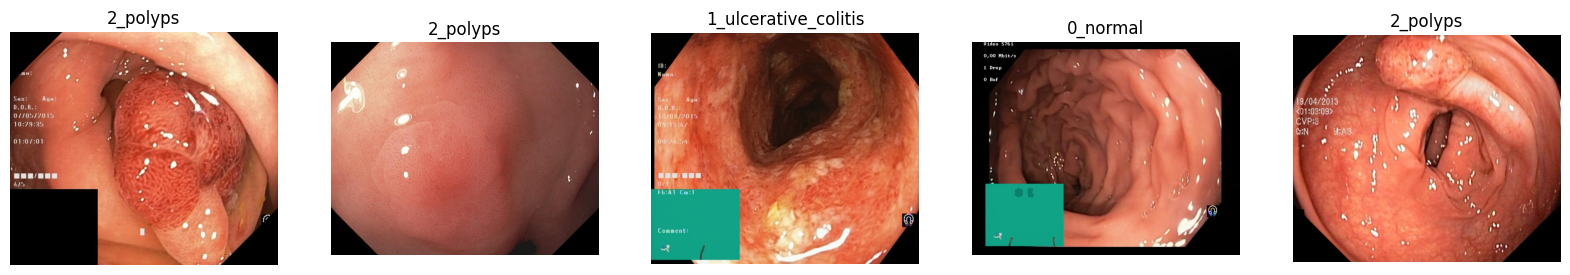

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_images(dirpath, class_names=class_names):
  plt.figure(figsize=(20, 14))
  for i in range(1, 6):
    class_name = random.choice(class_names)
    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)))
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)
view_random_images(TRAIN_DIR, class_names=class_names)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rescale=1/255.)
train_data = data_gen.flow_from_directory(TRAIN_DIR, target_size=(224, 224), batch_size=32, class_mode="categorical")
val_data = data_gen.flow_from_directory(VAL_DIR, target_size=(224, 224), batch_size=32, class_mode="categorical")
test_data = data_gen.flow_from_directory(TEST_DIR, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

# Define the input layer explicitly
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Create the feature extraction layer using hub.KerasLayer
feature_extractor = hub.KerasLayer(resnet_url, trainable=False, name='feature_extraction_layer')
feature_output = feature_extractor(input_layer)

# Remove GlobalAveragePooling2D layer as the feature extractor already outputs a feature vector
# feature_output = tf.keras.layers.GlobalAveragePooling2D()(feature_output) #
# Ensuring correct shape

# Create the output layer
output_layer = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(feature_output)

# Create the model using the functional API
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23572996 (89.92 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
history = model.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=len(val_data))

Epoch 1/20
100/100 [==============================] - 528s 5s/step - loss: 0.2861 - accuracy: 0.9016 - val_loss: 0.2519 - val_accuracy: 0.9075
Epoch 2/20
100/100 [==============================] - 517s 5s/step - loss: 0.0746 - accuracy: 0.9841 - val_loss: 0.2060 - val_accuracy: 0.9200
Epoch 3/20
100/100 [==============================] - 507s 5s/step - loss: 0.0484 - accuracy: 0.9872 - val_loss: 0.2034 - val_accuracy: 0.9190
Epoch 4/20
100/100 [==============================] - 510s 5s/step - loss: 0.0343 - accuracy: 0.9934 - val_loss: 0.1595 - val_accuracy: 0.9445
Epoch 5/20
100/100 [==============================] - 507s 5s/step - loss: 0.0246 - accuracy: 0.9950 - val_loss: 0.1753 - val_accuracy: 0.9335
Epoch 6/20
100/100 [==============================] - 524s 5s/step - loss: 0.0199 - accuracy: 0.9972 - val_loss: 0.1563 - val_accuracy: 0.9410
Epoch 7/20
100/100 [==============================] - 514s 5s/step - loss: 0.0154 - accuracy: 0.9984 - val_loss: 0.1774 - val_accuracy: 0.9325

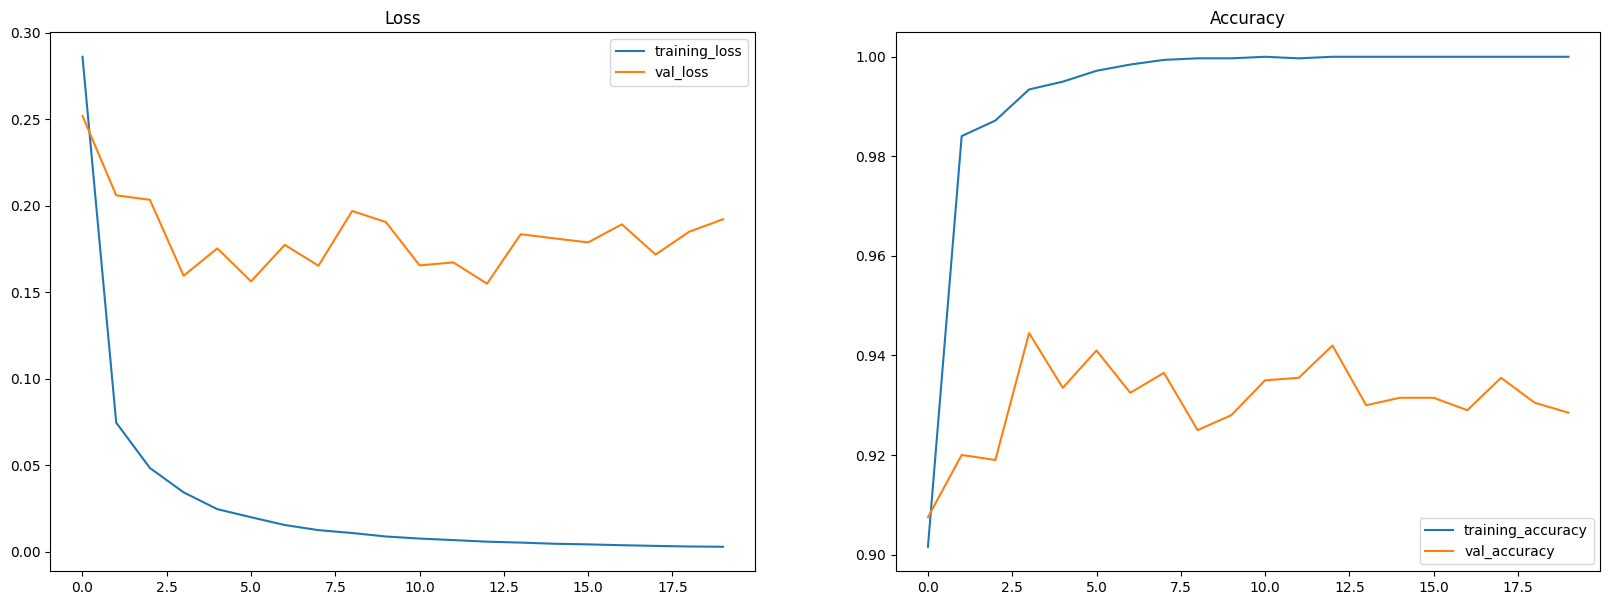

In [ ]:
import matplotlib.pyplot as plt
def plot_curves(history):
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="training_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title("Loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="training_accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.show()
plot_curves(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {(test_acc)*100:.2f}%")

25/25 [==============================] - 78s 3s/step - loss: 0.1837 - accuracy: 0.9375
Test Accuracy: 93.75%


In [ ]:
model.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/WCE_Curated_Colon_Detection_Model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/WCE_Curated_Colon_Detection_Model.keras")

In [ ]:
def pred_and_show(model, img_path, actual_class):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, [224, 224]) / 255.
    pred = model.predict(tf.expand_dims(img, 0))
    predicted_class = class_names[int(tf.argmax(pred[0]))]
    plt.imshow(img)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.axis(False)
    plt.show()

In [ ]:
def pred_random_image(model, dir_path=TEST_DIR):
    import random
    random_class = random.choice(class_names)
    img_path = os.path.join(dir_path, random_class, random.choice(os.listdir(os.path.join(dir_path, random_class))))
    pred_and_show(model, img_path, random_class)

1/1 [==============================] - 1s 564ms/step


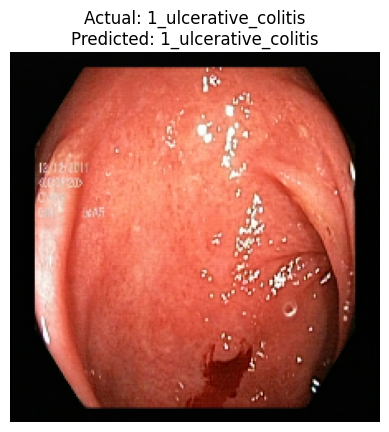

In [ ]:
pred_random_image(model)